In this notebook, we're going to train a simple MLP to predict handwritten digits using the well known [MNIST dataset](http://yann.lecun.com/exdb/mnist/) (which is handily provided by Keras itself).

In [ ]:
from keras import Sequential
from keras.src.datasets import mnist
from keras.src.utils import to_categorical
%tensorflow_version 2.x

from tensorflow.keras.layers import Dense, Flatten
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)


As you can see, we have 60000 train instances with a size of 28x28 pixels. Let's show one of them:

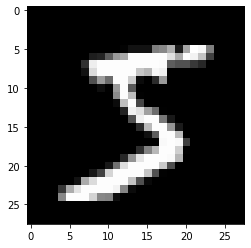

Label = 5


In [ ]:
plt.imshow(X_train[0], cmap='gray')
plt.show()
print('Label =', y_train[0])

Before we get to modeling, we perform a basic preprocessing step: we divide each value by 255 to make sure all values fall between 0 and 1.

In [ ]:
X_train = X_train.astype('float32')
X_test  = X_test.astype('float32')

X_train /= 255
X_test  /= 255

print(X_train.shape[0], 'train samples')
print(X_test.shape[0],  'test samples')

60000 train samples
10000 test samples


In [ ]:
num_classes = 10

We're also going to one-hot encode the outputs, as we're going to create 10 output neurons which each will give an output between 0 and 1.

In [ ]:
num_classes = 10

y_train = to_categorical(y_train, num_classes)
y_test  = to_categorical(y_test, num_classes)

print('First label is now = ', y_train[0])

First label is now =  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


We're now ready to define our model. We use a simple fully connected network here using 8 hidden neurons, followed by another layer of 8 hidden neurons, and finally our output layer. We use the ReLU activation function, except for the output, where we apply a softmax activation as we're doing a multiclass classification here.

In [ ]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 8)                 6280      
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_2 (Dense)              (None, 10)                90        
Total params: 6,442
Trainable params: 6,442
Non-trainable params: 0
_________________________________________________________________


The next step is then to compile our model.

In [ ]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

Finally, we can fit our model. `batch_size` determines the size of each minibatch to perform gradient descent on.

In [ ]:
batch_size  = 128
epochs      = 20

model.fit(
  X_train, y_train,
  batch_size=batch_size,
  epochs=epochs,
  verbose=1,
  validation_data=(X_test, y_test)
)

Epoch 1/20
469/469 [==============================] - 1s 2ms/step - loss: 1.1310 - accuracy: 0.6427 - val_loss: 0.5996 - val_accuracy: 0.8387
Epoch 2/20
469/469 [==============================] - 1s 2ms/step - loss: 0.5048 - accuracy: 0.8610 - val_loss: 0.4231 - val_accuracy: 0.8808
Epoch 3/20
469/469 [==============================] - 1s 2ms/step - loss: 0.4022 - accuracy: 0.8878 - val_loss: 0.3625 - val_accuracy: 0.8962
Epoch 4/20
469/469 [==============================] - 1s 2ms/step - loss: 0.3595 - accuracy: 0.8993 - val_loss: 0.3308 - val_accuracy: 0.9060
Epoch 5/20
469/469 [==============================] - 1s 2ms/step - loss: 0.3334 - accuracy: 0.9055 - val_loss: 0.3200 - val_accuracy: 0.9071
Epoch 6/20
469/469 [==============================] - 1s 2ms/step - loss: 0.3163 - accuracy: 0.9107 - val_loss: 0.3014 - val_accuracy: 0.9146
Epoch 7/20
469/469 [==============================] - 1s 2ms/step - loss: 0.3034 - accuracy: 0.9138 - val_loss: 0.2950 - val_accuracy: 0.9162
Epoch 

We can then use `evaluate` to report loss and accuracy on a new set of instances:

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)

print('Test loss:',     score[0])
print('Test accuracy:', score[1])

Test loss: 0.2600213289260864
Test accuracy: 0.9301000237464905


The `predict` function can be used to make predictions.

Note: since this function works on a batch of instances, even in case you give a single instance, we need to make sure we give a list containing a single instance. Here, we do so by wrapping the instance in a Numpy array. You could also use `np.expand_dimensions(X_train[0], axis=0)` instead.

In [ ]:
scores = model.predict(np.array([X_train[0]]))

print(scores)
print('Predicted label = ', np.argmax(scores))

[[7.2606690e-02 4.6177804e-09 2.5814823e-03 4.6774217e-01 1.2661126e-10
  4.5650512e-01 1.9573576e-10 4.7127518e-04 8.7923407e-05 5.3120202e-06]]
Predicted label =  3


Normally, you'd make sure to save you model at this point. Models can be loaded back in using [`load_model`](https://www.tensorflow.org/api_docs/python/tf/keras/models/load_model).

In [ ]:
model.save('my_model.h5')

We can inspect the layers of the model as follows:

In [ ]:
for layer in model.layers:
  print(layer.name, layer.get_config())

flatten {'name': 'flatten', 'trainable': True, 'batch_input_shape': (None, 28, 28), 'dtype': 'float32', 'data_format': 'channels_last'}
dense {'name': 'dense', 'trainable': True, 'dtype': 'float32', 'units': 8, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}
dense_1 {'name': 'dense_1', 'trainable': True, 'dtype': 'float32', 'units': 8, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}
dense_2 {'name': 'dense_2', 'trainable': True, 'dtype': 'float32', 'units': 10

Weights can be obtained as follows:

In [ ]:
print(model.layers[1].get_weights()[0].shape) # weights
print(model.layers[1].get_weights()[1].shape) # bias

# Alternatively, you can also use: model.get_layer('dense').get_weights()
# Or even: model.get_weights()[0]

(784, 8)
(8,)


The weights of the first dense layer can be easily visualized by reshaping them back to a 28x28 grid:

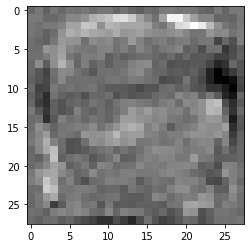

In [ ]:
rs = model.layers[1].get_weights()[0][:,0].reshape(28, 28)
plt.imshow(rs, cmap='gray')
plt.show()

Contrary to what you might expect, there isn't any human-interpretable structure in the first dense layer... We can show all eight neurons' weights as follows:

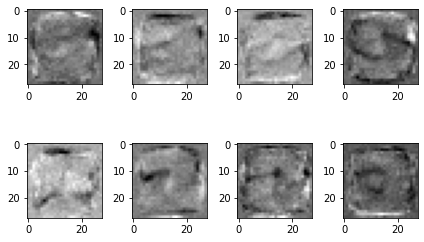

In [ ]:
gs = gridspec.GridSpec(2, 4)
for n in range(8):
  rs = model.layers[1].get_weights()[0][:,n].reshape(28, 28)
  ax = plt.subplot(gs[n])
  ax.imshow(rs, cmap='gray')
plt.tight_layout()
plt.show()

Another interesting idea to test is to see what the model thinks of random noise:

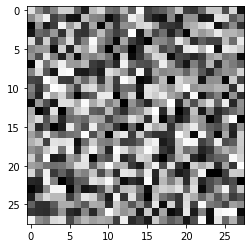

In [ ]:
random = np.random.rand(28, 28)
plt.imshow(random, cmap='gray')
plt.show()

In [ ]:
scores = model.predict(np.array([random]))

print(scores)
print('Predicted label = ', np.argmax(scores))

[[6.46768067e-14 9.21883329e-05 9.71407413e-01 2.84888018e-02
  2.17079539e-17 2.46408040e-23 2.73413036e-07 1.13695323e-05
  1.06832265e-10 3.62780722e-24]]
Predicted label =  2


Things to try:

- Can you increase the accuracy using only dense layers by e.g. adding more layers or hidden neurons?
- Try defining an additional label ("noise") and training the network on random images as done above. Is the network more robust to noise now?
- Is the network being convinced about its prediction on random noise the result of how softmax works, or something else?
- Since we're using ReLU, you might be wondering whether the last layer's activations couldn't be kept to simple linear activations (or sigmoid, even) instead of softmax. Try this out.
- As a harder challenge, try replacing the softmax activation with a normal normalization step (this works as none of our intermediate outputs can be negative), e.g. using something like `final_layer = Lambda(lambda t: t / tensorflow.linalg.norm(t, ord=1))(x)`. You'll need some extra imports (e.g. `tensorflow.keras.layers.Lambda`) and use the functional rather than sequential model API (`from tensorflow.keras.models import Model`). You can revisit this later on after we have utilized this API.